#  Assignment on Model Selection

## 

### Do the following on titanic dataset
   ###   1. Load the dataset into python environment
   ###   2. Do all the necessary pre-processing steps
   ###   3. Create kNN and SVM models
   ###   4. Do k-fold and stratified stratified k-fold cross validation techniques and find the    average accuracy score of the models


## 

   ###   1. Load the dataset into python environment

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset 
data = pd.read_csv('titanic_dataset (1).csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# shape of the dataset
data.shape

(891, 12)

In [6]:
# columns of the dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# data types of the dataset
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# to disply description about data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   ###   2. Do all the necessary pre-processing steps

In [11]:
#### preprocessing the dataset

# check for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.isna().sum() / data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
# here more than 75% missing values present cabin column.so drop that column ,and also deleting PassengerId,Name, Ticket columns which are not useful in predictive analysis bcz the values are unique for each row.these columns many not contribute much to our ml moldel.
data1 = data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# fill in the missing values present in the column Embarked

cabin_mode = data1['Embarked'].mode()[0]
data1['Embarked'] = data1['Embarked'].fillna(cabin_mode)


In [15]:
data1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

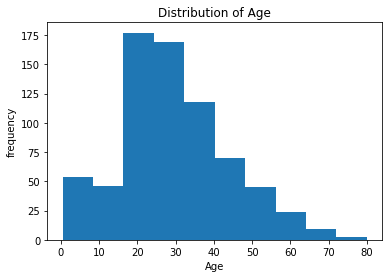

In [16]:
### histogram of the Age

plt.hist(data1['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

In [17]:
### not a normal distribution ,it is right skewed ,so take median.

age_median = data1['Age'].median()
data1['Age'] = data1['Age'].fillna(age_median)

In [18]:
data1.isna().sum() # now got clean dataset

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
# Encoding 
data1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [20]:
data1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
# applying one-hot encoding.
data1 = pd.get_dummies(data1)


In [23]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
data1.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [25]:
data1.shape

(891, 11)

<AxesSubplot:>

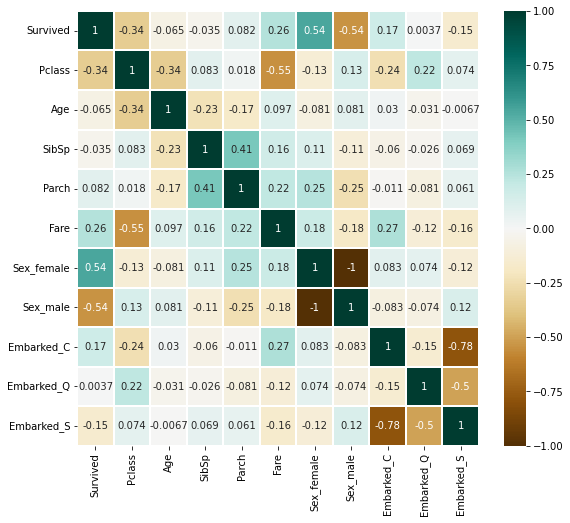

In [26]:
# correlation
# correlation matrix   , heatmap
corrmatrix =data1.corr()
plt.subplots(figsize=(9,8))
sns.heatmap(corrmatrix,cmap = 'BrBG', annot=True,linewidths=0.2)


In [27]:
data1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
# splitting our dataset into train and test

x = data1.drop('Survived', axis=1)
y = data1['Survived']

In [30]:
x1 = x.drop(['Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'],axis=1)

In [31]:
x1.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [32]:
# import minmax scalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))# range 
x1 = min_max_scaler.fit_transform(x1)

In [33]:
x1= pd.DataFrame(x1,columns=['Pclass','SibSp','Parch','Fare','Age'])

In [34]:
x1.describe() # min - 0 max - 1

,Pclass,SibSp,Parch,Fare,Age
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
x.drop(['Pclass','SibSp','Parch','Fare','Age'],axis=1,inplace=True)

In [36]:
x = pd.concat([x1,x],axis=1)

In [37]:
x.head(4)

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.014151,0,1,0,0,1
1,0.0,0.472229,0.125,0.0,0.139136,1,0,1,0,0
2,1.0,0.321438,0.000,0.0,0.015469,1,0,0,0,1
3,0.0,0.434531,0.125,0.0,0.103644,1,0,0,0,1


   ###   3. Create KNN and SVM models

In [38]:
# importing library
from sklearn.model_selection import train_test_split

In [39]:
# splitting the data into training and testing set

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size=0.30,
                                                     random_state=42)

### KNeighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [41]:
metric_k = []          # create an empty list
neighbors = range(3,15)
for k in neighbors:
    knn =  KNeighborsClassifier(n_neighbors=k)       ## creating an instance of the knn
    knn.fit(x_train,y_train)                 # fiting the model
    y_pred_knn = knn.predict(x_test)                ## let's make a prediction
    acc = accuracy_score(y_test,y_pred_knn)        # calculate the accuracy
    metric_k.append(acc)                  # appended to the list of value

In [42]:
metric_k

[0.7761194029850746,
 0.7910447761194029,
 0.7873134328358209,
 0.7910447761194029,
 0.7686567164179104,
 0.7985074626865671,
 0.8059701492537313,
 0.7985074626865671,
 0.8022388059701493,
 0.8022388059701493,
 0.7985074626865671,
 0.7985074626865671]

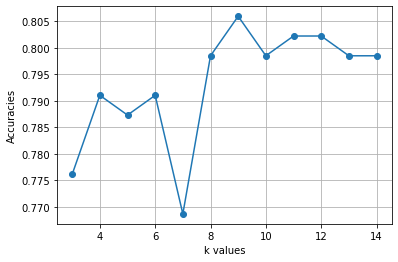

In [43]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [44]:

knn =  KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print('accuracy_score of KNN :',accuracy_score(y_test,y_pred_knn))


accuracy_score of KNN : 0.8059701492537313


### SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm_clf = SVC(kernel='rbf')
svm_clf = svm_clf.fit(x_train,y_train)
y_pred_svm = svm_clf.predict(x_test)
print('accuracy_score SVM :',accuracy_score(y_test,y_pred_svm))


accuracy_score SVM : 0.7985074626865671


###   4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models


### k-fold cross validation

In [47]:
# importing library 
from sklearn.model_selection import KFold

In [48]:
kfold_validator = KFold(10)


In [49]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:', train_index)
    print('Test index:', test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

#### KNN  -  k-fold cross validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cv_result_knn = cross_val_score(knn,x,y, cv = kfold_validator)
cv_result_knn

array([0.75555556, 0.82022472, 0.7752809 , 0.78651685, 0.83146067,
       0.80898876, 0.79775281, 0.74157303, 0.83146067, 0.76404494])

In [52]:
#  find average
np.mean(cv_result_knn)

0.7912858926342072

##### k-fold cross validation for KNeighborsClassifier model it gives 79.1 % average accuracy score.

#### SVM  -  k-fold cross validation

In [53]:
cv_result_svm = cross_val_score(svm_clf,x,y, cv = kfold_validator)
cv_result_svm

array([0.81111111, 0.84269663, 0.78651685, 0.82022472, 0.83146067,
       0.82022472, 0.78651685, 0.75280899, 0.85393258, 0.80898876])

In [54]:
# find average
np.mean(cv_result_svm)

0.8114481897627964

##### k-fold cross validation for SVM model it gives 81.1 % average accuracy score.

### Stratified k-fold cross validation

In [55]:
# import library
from sklearn.model_selection import StratifiedKFold

In [56]:
skfold_validator = StratifiedKFold(n_splits=10)

In [57]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:', train_index)
    print('Test index:', test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

#### KNN - stratified k-fold cross validation

In [58]:
skcv_result_knn = cross_val_score(knn,x,y, cv = skfold_validator)

In [59]:
skcv_result_knn

array([0.75555556, 0.83146067, 0.74157303, 0.79775281, 0.86516854,
       0.79775281, 0.82022472, 0.75280899, 0.80898876, 0.76404494])

In [60]:
# find average
np.mean(skcv_result_knn)

0.7935330836454433

##### stratified k-fold cross validation for KNeighborsClassifier model it gives 79.35 % average accuracy score.

#### svm - stratified k-fold cross validation

In [61]:
skcv_result_svm = cross_val_score(svm_clf,x,y, cv = skfold_validator)

In [62]:
skcv_result_svm

array([0.82222222, 0.78651685, 0.78651685, 0.85393258, 0.86516854,
       0.79775281, 0.80898876, 0.76404494, 0.83146067, 0.79775281])

In [63]:
# find average
np.mean(skcv_result_svm)

0.8114357053682897

##### stratified k-fold cross validation for SVM model it gives 81.1 % average accuracy score.

### k-fold cross validation average accuracy score of KNN : 79.12%
### k-fold cross validation average accuracy score of SVM : 81.144 %





### stratified k-fold cross validation average accuracy score of KNN : 79.35 %
### stratified k-fold cross validation average accuracy score of SVM :  81.143 %
